# Installation
Normal installation from the command line (assuming you have Python3 installed)
```
$ python3 -m venv venv
$ source venv/bin/activate
(venv) $ pip install stocksml
```

From a Jupyter notebook environment such as Google Colab
```
!pip install stocksml
```

# Quick Start

Quick demonstration using included sample data sources.


In [ ]:
 import os
 os.system("pip install --extra-index-url https://test.pypi.org/simple/ stocksml==0.0.1rc14")
 print('installed stocksml')

installed stocksml


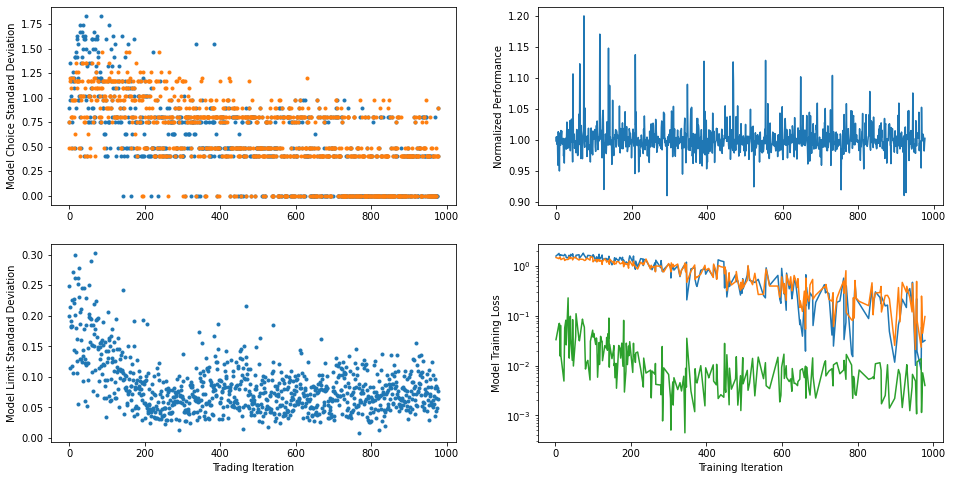


2021-02-01   buy  limit order for   11 shares of  bnd at   87.8  ->  bought   11 shares at   87.2  ($40.3, $1000.0,   87.4,   87.2,   87.2,   87.3 )
2021-02-02  sell market order for   11 shares of  bnd at    0.0  ->    sold   11 shares at   87.2  ($999.6, $999.6,   87.2,   87.2,   87.2,   87.2 )
2021-02-02   buy  limit order for   10 shares of  bnd at   92.9  ->  bought   10 shares at   87.2  ($127.5, $999.6,   87.2,   87.2,   87.2,   87.2 )
2021-02-03  sell market order for   10 shares of  bnd at    0.0  ->    sold   10 shares at   87.2  ($999.1, $999.1,   87.2,   87.1,   87.2,   87.1 )
2021-02-03   buy  limit order for   11 shares of  bnd at   84.1
2021-02-04   buy  limit order for   12 shares of  bnd at   77.1
2021-02-05   buy  limit order for   12 shares of  bnd at   82.6
---------- result = $999.1 at 0.962 of baseline ----------



In [ ]:
from stocksml import Demo

Demo(notebook=True)

## Load Data



In [ ]:
from stocksml import LoadData, BuildData

# load symbols and build a symbol dataframe
sdf, symbols = LoadData(symbols=['SPY','BND'])

# convert symbol dataframe to a feature dataframe
fdf = BuildData(sdf)

fdf.head()

building BND data...
building SPY data...


,bnd0,bnd1,bnd2,bnd3,bnd4,spy0,spy1,spy2,spy3,spy4
date,,,,,,,,,,
2017-01-03,-0.001654,-0.000511,-0.001190,-0.000778,0.371118,-0.004692,-0.003802,-0.003938,-0.003082,0.018743
2017-01-04,0.009508,0.018398,0.053818,0.006910,0.080335,0.028361,0.045359,0.013076,0.026660,0.391944
2017-01-05,0.109609,0.010800,0.025270,0.051719,0.385050,-0.010775,-0.007476,0.015081,-0.007054,0.026528
2017-01-06,-0.043183,0.003252,0.021451,-0.041545,-0.413196,0.037203,0.008074,0.003648,0.014804,0.152411
2017-01-09,0.012214,0.010019,0.011997,0.024802,-0.107640,-0.028913,0.010770,0.007136,-0.019585,-0.380552


## Build a Model

Define a model and create a set of 2 or more with corresponding training data.

In [ ]:
from stocksml import BuildModel

models, dx = BuildModel(fdf, len(symbols), layers=[('rnn',32),('dnn',64),('dnn',32)], count=2)

models[0].summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5, 10)]      0                                            
__________________________________________________________________________________________________
simple_rnn_1 (SimpleRNN)        (None, 32)           1376        input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 64)           2112        simple_rnn_1[0][0]               
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 32)           2080        dense_5[0][0]                    
____________________________________________________________________________________________

## Learn a Strategy

After creating a set of adversarial models and the corresponding training data formatted for them, StocksML is ready to learn a new trading strategy.  This is done in an unsupervised manner, meaning no truth data is provided.  

The algorithm begins with each model making random guesses.  When one model successfully guesses a sequence of trades that results in superior performance (i.e. makes money or beats a benchmark), that model's strategy is "learned" by the unsuccessful model. This continues for a set period of iterations or until it appears that the models are no longer learning anything useful.

The ```LearnStrategy``` function displays a live plot of various metrics to illustrate the learning process and help inform when a good stopping point might be.

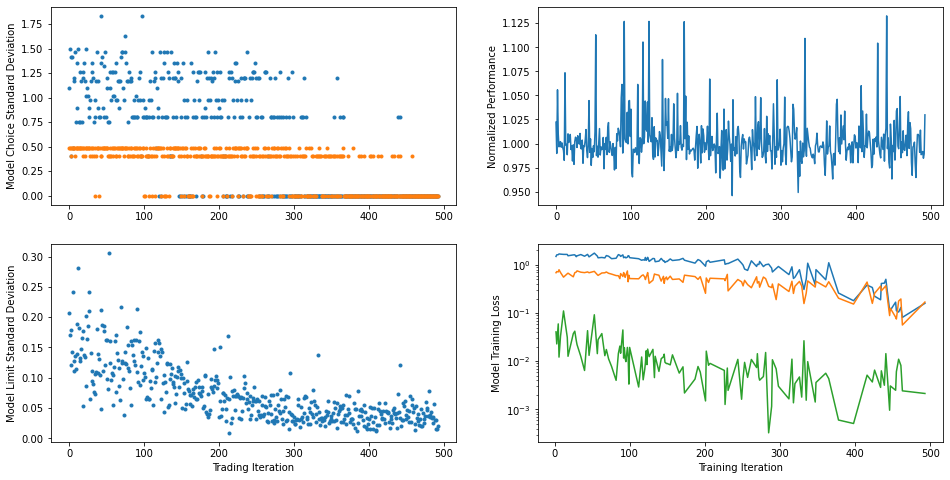

In [ ]:
from stocksml import LearnStrategy

LearnStrategy(models, sdf, dx, symbols, 'SPY', 5, 500, True)

## Examine the Strategy

Once a trading strategy has been learned, it can be applied to different points in time across the available market data to see what it does and how it performs. 

To avoid overfitting, it would be wise to examine strategy performance on data that wasn't used for training.

In [ ]:
from stocksml import ExamineStrategy

ExamineStrategy(models[0], sdf, dx, symbols, '2021-02-01', days=5, baseline='SPY')


2021-02-01   buy market order for   11 shares of  bnd at    0.0  ->  bought   11 shares at   87.2  ($40.3, $1000.0,   87.4,   87.2,   87.2,   87.3 )
2021-02-01  sell  limit order for   11 shares of  bnd at   94.7
2021-02-02  sell market order for   11 shares of  bnd at    0.0  ->    sold   11 shares at   87.2  ($999.6, $999.6,   87.2,   87.2,   87.2,   87.2 )
2021-02-02   buy market order for   11 shares of  bnd at    0.0  ->  bought   11 shares at   87.2  ($40.3, $999.6,   87.2,   87.2,   87.2,   87.2 )
2021-02-02  sell  limit order for   11 shares of  bnd at   81.2  ->    sold   11 shares at   87.2  ($999.6, $999.6,   87.2,   87.2,   87.2,   87.2 )
2021-02-03   buy market order for   11 shares of  bnd at    0.0  ->  bought   11 shares at   87.2  ($40.9, $999.6,   87.2,   87.1,   87.2,   87.1 )
2021-02-03  sell  limit order for   11 shares of  bnd at   96.2
2021-02-04  sell market order for   11 shares of  bnd at    0.0  ->    sold   11 shares at   87.0  ($998.5, $998.5,   87.1,   86